# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [12]:
df=pd.read_csv('df_sklearn_ready.csv')
df.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,False,True,False,False,False,True,False,False,False,False
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,False,True,False,False,False,True,False,False,False,False


In [13]:
df.dtypes

Unnamed: 0                                  int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool
estado_civil_Married                         bool


In [14]:
for coluna in df.columns:
    try:
        df[coluna] = df[coluna].astype(int)
    except ValueError:
        try:
            df[coluna] = df[coluna].astype(float)
        except ValueError:
            pass  # Se não for possível converter, mantenha o tipo original

df.dtypes

Unnamed: 0                                int32
qtd_filhos                                int32
idade                                     int32
tempo_emprego                             int32
possui_celular                            int32
possui_fone_comercial                     int32
possui_fone                               int32
possui_email                              int32
qt_pessoas_residencia                     int32
mau                                       int32
sexo_M                                    int32
tipo_renda_Pensioner                      int32
tipo_renda_State servant                  int32
tipo_renda_Student                        int32
tipo_renda_Working                        int32
educacao_Higher education                 int32
educacao_Incomplete higher                int32
educacao_Lower secondary                  int32
educacao_Secondary / secondary special    int32
estado_civil_Married                      int32
estado_civil_Separated                  

In [95]:
# Separando a variável resposta e as variáveis explicativas
X = df.drop(['mau'], axis=1)
y = df.mau

# Dividindo a base (70% treino, 30% validação)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [84]:
print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de validação: {X_val.shape}')

Tamanho do conjunto de treinamento: (11655, 27)
Tamanho do conjunto de validação: (4995, 27)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [85]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [86]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

In [87]:
clf.score(X,y)

1.0

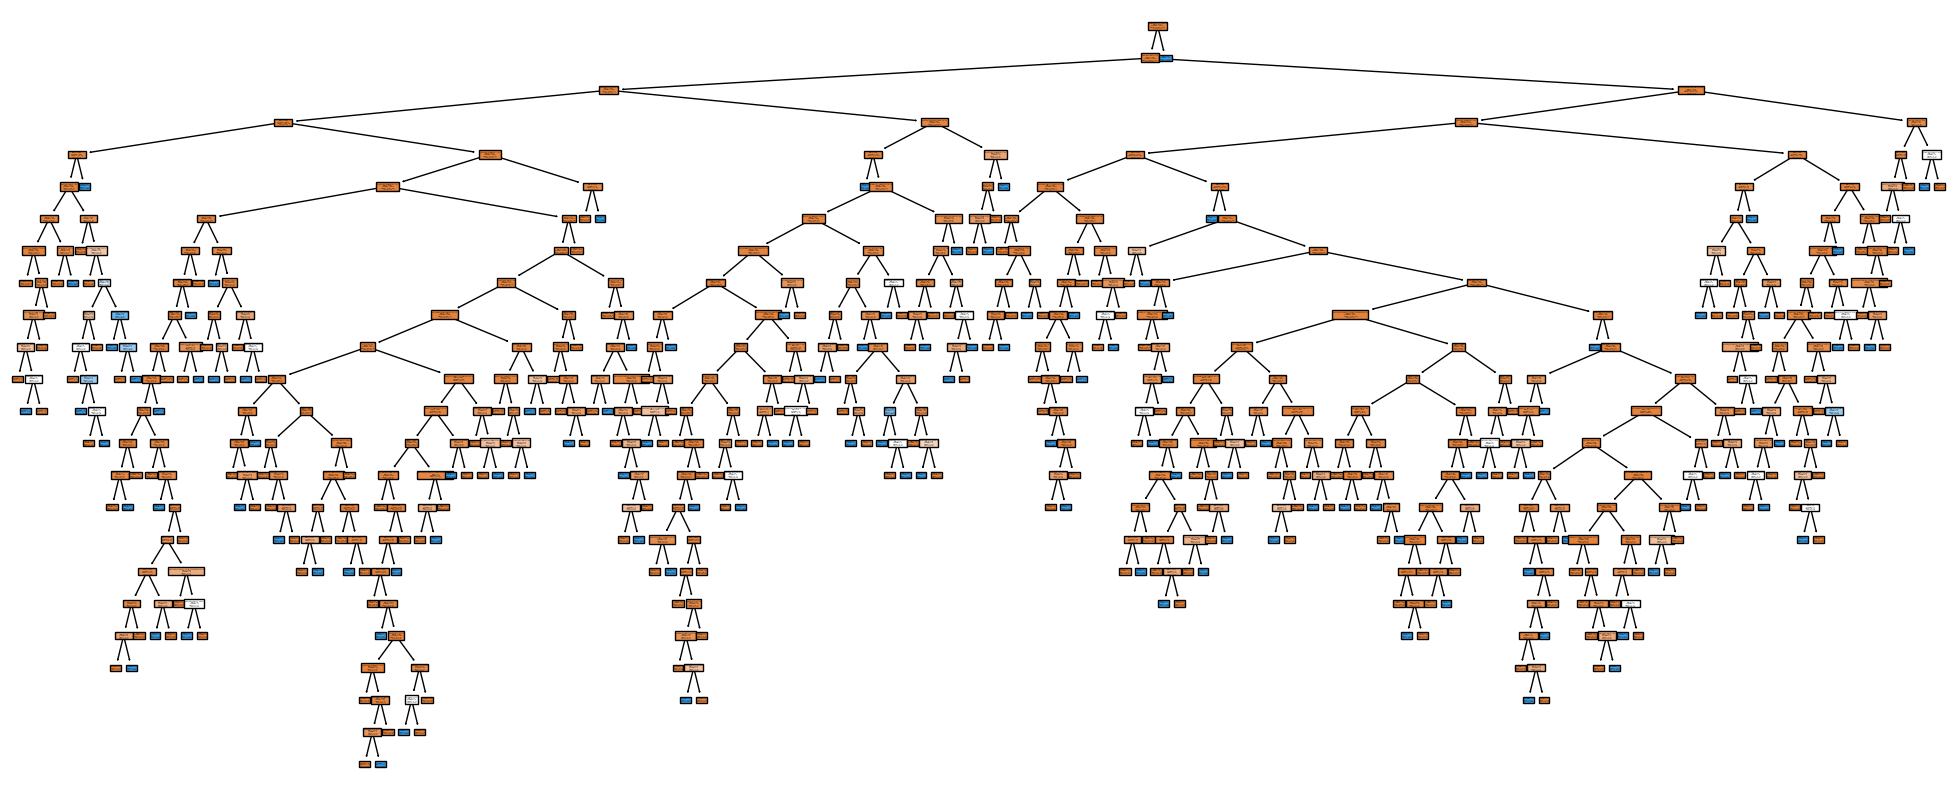

In [61]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=list(X.columns));

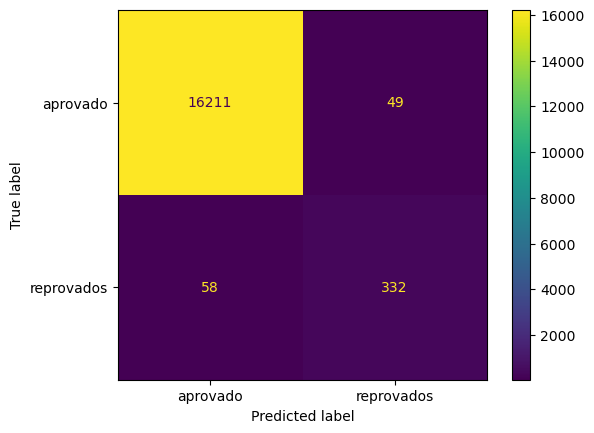

In [99]:
preditos = clf.predict(X)
cm = confusion_matrix(y, preditos, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovado', 'reprovados'])

MatrizDeConfusao.plot()

In [90]:
predict = clf.predict(X)

accuracy_score(y, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [96]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

In [97]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0])

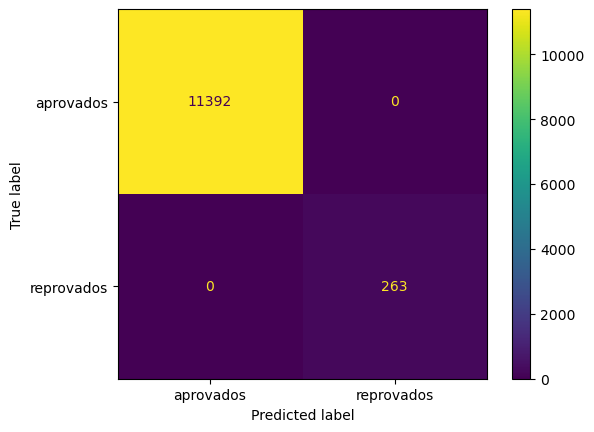

In [100]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

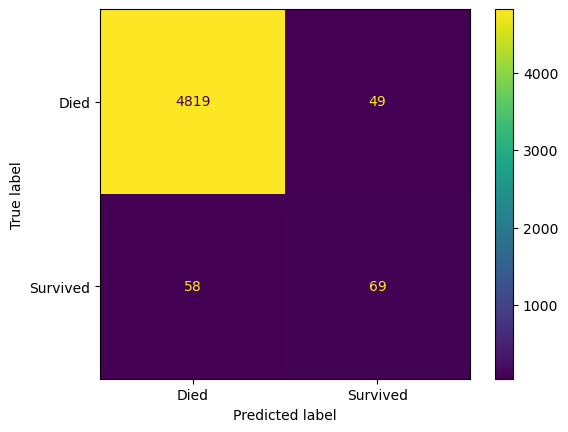

In [101]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])

MatrizDeConfusao.plot()

In [102]:
X_test.shape

(4995, 27)

In [103]:
accuracy_score(y_test, y_chapeu_teste)

0.9785785785785786